In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_recall_fscore_support as prf

In [137]:
class BayesClassifier:
    def __init__(self, cl1, cl2, cl3):
        #Loading Training Data 
        self.c1 =  np.array(pd.read_csv("./classification"+cl1, header = None, delimiter = ' ').values.tolist())
        self.c2 =  np.array(pd.read_csv("./classification"+cl2, header = None, delimiter = ' ').values.tolist())
        self.c3 =  np.array(pd.read_csv("./classification"+cl3, header = None, delimiter = ' ').values.tolist())
        self.u1 =  np.mean(self.c1,axis=0,dtype = np.float64)
        self.u2 =  np.mean(self.c2,axis=0,dtype = np.float64)
        self.u3 =  np.mean(self.c3,axis=0,dtype = np.float64)
        self.cov1 = np.cov(self.c1[:,0],self.c1[:,1])
        self.cov2 = np.cov(self.c2[:,0],self.c2[:,1])
        self.cov3 = np.cov(self.c3[:,0],self.c3[:,1])
        e1 = (1/3)*(self.cov1[0][0]+self.cov2[0][0]+self.cov3[0][0])
        e2 = (1/3)*(self.cov1[0][1]+self.cov2[0][1]+self.cov3[0][1])
        e3 = (1/3)*(self.cov1[1][0]+self.cov2[1][0]+self.cov3[1][0])    
        e4 = (1/3)*(self.cov1[1][1]+self.cov2[1][1]+self.cov3[1][1])
        self.cov_avg = np.array([[e1,e2],[e3,e4]]) 

        

    def calcBayes(self,x,u,cov):
        e=2.7183
        pi=3.142
        d=[]
        covinv=[[cov[1][1],-1*cov[0][1]],[-1*cov[1][0],cov[0][0]]]
        d=[x[0]-u[0],x[1]-u[1]]
        d1=covinv[0][0]*d[0]+covinv[0][1]*d[1]
        d2=covinv[1][0]*d[0]+covinv[1][1]*d[1]
        val=(-0.5*(d[0]*d1+d[1]*d2))
        covdet=(abs(cov[0][0]*cov[1][1]-cov[0][1]*cov[1][0]))**0.5
        res=math.log(1/(2*pi*covdet))*val
        return res
    
    
    
    def model1(self, x):
        u1,u2=self.u1,self.u2
        u3 =self.u3
        Y_predicted=[]
        cov_avg=[[self.cov_avg[0][0],0],[0,self.cov_avg[1][1]]]
        for i in x:
            p1 = [self.calcBayes(i,u1,cov_avg),1]
           p2 = [self.calcBayes(i,u2,cov_avg),2]    
#             p3 = [self.calcBayes(i,u3,cov_avg),3]
            p=[p1,p2]
            Y_predicted.append(p[(p.index(max(p)))][1]) 
        return (Y_predicted)
        
    def model2(self,x):
        u1,u2=self.u1,self.u2
        u3 =self.u3
        cov=self.cov_avg    
        Y_predicted=[]        
        for i in x:
            p1 = [self.calcBayes(i,u1,cov),1]
           p2 = [self.calcBayes(i,u2,cov),2]    
#             p3 = [self.calcBayes(i,u3,cov),3]
            p=[p1,p2]
            Y_predicted.append(p[(p.index(max(p)))][1])
        return (Y_predicted)        
        
    def model3(self,x):
        u1,u2=self.u1,self.u2
        u3 =self.u3
        Y_predicted=[]
        cov_d1 = [[self.cov1[0][0],0],[0,self.cov1[1][1]]]
        cov_d2 = [[self.cov2[0][0],0],[0,self.cov2[1][1]]]
        cov_d3 = [[self.cov3[0][0],0],[0,self.cov3[1][1]]]
        for i in x:
            p1 = [self.calcBayes(i,u1,cov_d1),1]
            p2 = [self.calcBayes(i,u2,cov_d2),2]    
#             p3 = [self.calcBayes(i,u3,cov_d3),3]
            p=[p1,p2]
            Y_predicted.append(p[(p.index(max(p)))][1])
        return (Y_predicted)

    def model4(self,x):
        u1,u2=self.u1,self.u2
        u3 =self.u3        
        Y_predicted=[]        
        for i in x:
            p1 = [self.calcBayes(i,u1,self.cov1),1]
            p2 = [self.calcBayes(i,u2,self.cov2),2]    
#             p3 = [self.calcBayes(i,u3,self.cov3),3]
            p=[p1,p2]
            Y_predicted.append(p[(p.index(max(p)))][1])
        return (Y_predicted)
        
        
    
    def classify(self, points, model_number):
        v ={1:"1",2:"2",
           3:"3",
           4:"4",}
        m = v.get(model_number,"NA")
        if m=="1":
            return self.model1(points)
        elif m=="2":
            return self.model2(points)
        elif m=="3":
            return self.model3(points)
        elif m=="4":
            return self.model4(points)
        else:
            print("Invalid Choice!!")
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 43)

In [138]:
cl1 = "/overlapping/class1_train.txt"
cl2="/overlapping/class2_train.txt"
cl3="/overlapping/class3_train.txt"
ob = BayesClassifier(cl1,cl2,cl3)
d = pd.DataFrame({'x':[],'y':[],'class':[]})
df = pd.read_csv("./classification"+cl1, header =None,delimiter = ' ')
c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification"+cl2, header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification"+cl3, header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())

for i in range(len(c1)):
     d.loc[len(d.index)]=[c1[i][0],c1[i][1],1]
for i in range(len(c2)):
    d.loc[len(d.index)]=[c2[i][0],c2[i][1],2]
# for i in range(len(c1)):
#     d.loc[len(d.index)]=[c3[i][0],c3[i][1],3]


df = pd.read_csv("./classification/overlapping/class1_test.txt", header =None,delimiter = ' ')
c1 = c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification/overlapping/class2_test.txt", header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification/overlapping/class3_test.txt", header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())
# a.classify(c1)

<function matplotlib.pyplot.show(close=None, block=None)>

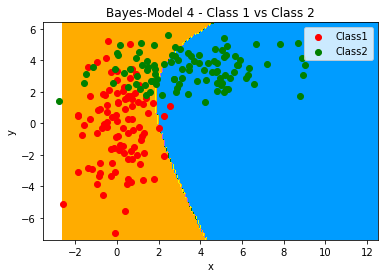

In [142]:
mini = d.min()
maxi = d.max()

xgrid = np.arange(mini[0], maxi[0], 0.1)
ygrid = np.arange(mini[1], maxi[1], 0.1)
xx,yy=np.meshgrid(xgrid,ygrid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
g=np.array(ob.model4(grid))
z=g.reshape(yy.shape)
plt.contourf(xx, yy, z, colors=['#009cff','#ebff00','#ffac00','#b055f1','g'])
plt.scatter(c1[:,0],c1[:,1],color='red',label='Class1')
plt.scatter(c2[:,0],c2[:,1],color='green',label='Class2')
# plt.scatter(c3[:,0],c3[:,1],color='blue',label='Class3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayes-Model 4 - Class 1 vs Class 2')
plt.legend()
plt.show

In [133]:
def metrics(model):
    #For cm and other values
    c4 = np.concatenate((c1,c2,c3))
    class1_freq = np.array(c1[:,0])
    for i in range(0,c1[:,0].size):
        class1_freq[i] = 1
    class2_freq = np.array(c2[:,0])
    for i in range(0,c2[:,0].size):
        class2_freq[i] = 2
    class3_freq = np.array(c3[:,0])
    for i in range(0,c3[:,0].size):
        class3_freq[i] = 3    
    class_freq = np.concatenate((class1_freq,class2_freq,class3_freq))

    #consusion matrix
    a=ob.classify(c4,model)
    print(a)
    cm1 = cm(class_freq,a)

    #Other Required Values
    prf1 = prf(class_freq,a)
    precision = prf1[0]
    recall =prf1[1]
    f1_score = prf1[2]
    recall
    acc_counter = 0
    for i in range(0,class_freq.size):
        if class_freq[i]== a[i]:
            acc_counter += 1
    accuracy = (acc_counter)/(class_freq.size)
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F1_Score = " + str(f1_score))
    


In [10]:
metrics(3)

[3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Accuracy = 0.0
Precision = [0. 0. 0.]
Recall = [0. 0. 0.]
F1_Score = [0. 0. 0.]


In [31]:
xx.shape


(39, 40)